In [1]:
from helper import (load_data, token,time_me,
                    show_diagram, show_most_informative_features)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight') # plt.style.available

In [5]:
from sklearn.externals import joblib
from sklearn.model_selection import (train_test_split, KFold,
                                     cross_val_score)
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer, TfidfVectorizer)

#### TfidfVectorizer == CountVectorizer + TfidfTransformer

In [3]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegressionCV

In [6]:
stops = joblib.load('../stops.pkl')

Loading data ...
Droping 10 rows with features lenght of less than 2
Droping 3 as rating and setting 1-2 as negative(0), 4-5 as positive(1))
{1: 460527, 0: 127232} 

Down sampling positive ratings to match negatives
Data loading completed
{1: 127232, 0: 127232} 

Execution Time: 4 seconds


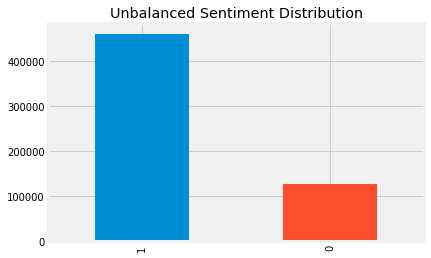

In [7]:
df = load_data('../sentiment_data', balanced=True)

In [11]:
df.head()

,features,target,y
0,Internetkøb med postleverance på under 24 time...,5,1
1,Let og hurtig behandling af erstatning. \r\nMe...,5,1
2,Venlig og hurtig betjening,5,1
3,Super hurtig og effektiv forsendelse lige til ...,5,1
4,"Nemt at bestille, hurtig levering og varen er ...",5,1


In [13]:
 X_train, X_test, y_train, y_test = train_test_split(df['features'], df['y'],
                                                    test_size=.2, random_state=7,stratify=df['y'])

In [23]:
print(f'Traing Size: {X_train.shape[0]}\nTest Size: {X_test.shape[0]:>8}')

Traing Size: 203571
Test Size:    50893


In [33]:
print(f'Traing Size\n\tPositive||Negative Sample\n\t  {y_train[y_train==1].shape[0]}||{y_train[y_train==0].shape[0]}')

Traing Size
	Positive||Negative Sample
	  101785||101786


In [34]:
print(f'Test Size\n\tPositive||Negative Sample\n\t  {y_test[y_test==1].shape[0]}||{y_test[y_test==0].shape[0]}')

Test Size
	Positive||Negative Sample
	  25447||25446


In [ ]:
lr_clf  = Pipeline((
        ('vec',  CountVectorizer(ngram_range=(1, 2), max_features=100000,
                                 tokenizer=token, stop_words=stops)),
        ('fe_se', SelectKBest(chi2, k=5000)),
        ('tfidf', TfidfTransformer(sublinear_tf=True)),
        ('clf', LogisticRegressionCV(cv=5,solver='saga',scoring='accuracy', n_jobs=-1, verbose=1))
    ))

In [ ]:
lr_clf.fit(X_train, y_train)

### c.40 minutes later

In [38]:
%%time
lr_clf.score(X_test, y_test)

Wall time: 15.6 s


0.9394612225649893

Classification Report
	 _____________________________________________
             precision    recall  f1-score   support

   Negative       0.93      0.95      0.94     25446
   Positive       0.95      0.93      0.94     25447

avg / total       0.94      0.94      0.94     50893

	 _____________________________________________ 




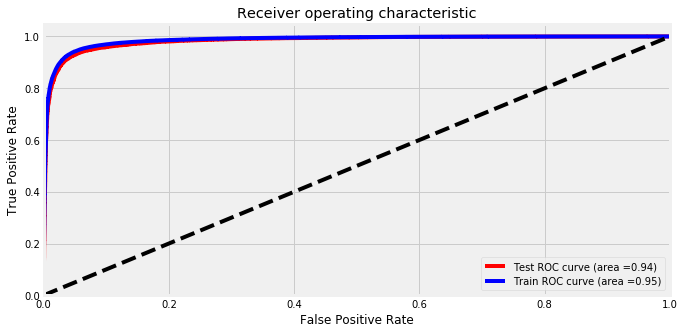

Execution Time: 3 minutes and 37 seconds


In [41]:
show_diagram(lr_clf, X_train, y_train, X_test, y_test, compare_test=True)

In [49]:
feature_names = lr_clf.steps[0][1].get_feature_names()

In [57]:
best_features = [feature_names[i] for i in lr_clf.steps[1][1].get_support(indices=True)]

In [59]:
show_most_informative_features(best_features, lr_clf.steps[3][1], n=100)

	-8.4098	dår            		8.5911	hurt           
	-8.2037	ikk ord        		8.1640	:)             
	-8.1528	ing pak        		7.8441	perfek         
	-7.8648	elend          		7.6681	nemt           
	-7.6214	uacceptabelt   		7.5689	dej            
	-7.2536	km             		7.2026	sup            
	-6.6347	ikk tilfred    		7.1727	god            
	-6.0991	ikk            		6.6324	enest minus    
	-5.9916	dår servic     		6.3781	fremrag        
	-5.9065	hjem hel       		5.9486	tilfred        
	-5.9060	gls            		5.6757	fantastisk     
	-5.7771	uacceptabel    		5.5362	ing problem    
	-5.7618	:(             		5.2753	sæt fing       
	-5.6441	grin           		5.1333	smertefrit     
	-5.6313	smadr          		4.9693	fin            
	-5.5859	øv             		4.7507	mang tak       
	-5.5858	omm            		4.7333	behag          
	-5.5724	værst          		4.5778	int klag       
	-5.5111	ikk god        		4.4693	effektiv       
	-5.4971	ikk iord       		4.4498	smil           
	-5.4897	urim       